In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

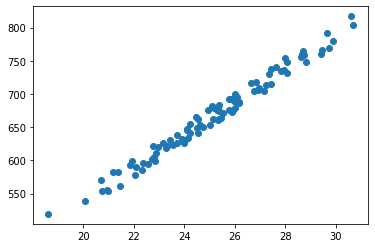

In [2]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [3]:
data = (data - data.min()) / (data.max() - data.min())  #Normalize

In [4]:
model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [6]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 150ms/step - loss: 0.0223 - val_loss: 0.0224
Epoch 2/100
3/3 [==============================] - 0s 61ms/step - loss: 0.0197 - val_loss: 0.0196
Epoch 3/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0155 - val_loss: 0.0153
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0124 - val_loss: 0.0122
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 8/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 9/100
3/3 [==============================] - 0s 46ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 10/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 11/100
3/3 [

In [7]:
y_pred = model.predict(data['area'])

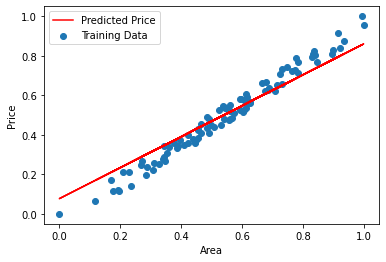

In [8]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.7827941]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.07712875], dtype=float32)>]